## Задание 6. Введение в эконометрику временных рядов

## Цель задания:
### 1. Получить первичные навыки работы с финансовыми временными рядами
### 2. Провести проверку на стационарность и выявить значимые лаги
### 3. Построить простую модель ARIMA
### 4. Построть модель рыночной беты для выбранного актива 

## 1.Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import statsmodels.tsa as tsa ### анализ временных рядов
import statsmodels.graphics.tsaplots as tsaplots ### визуализация параметров временных рядов
import statsmodels.formula.api as smf ### регрессионная модель
import statsmodels.stats.outliers_influence  ### регрессионные тесты
import statsmodels.stats.api as test ### регрессионные тесты
import statsmodels.stats.diagnostic as diagnostic ### регрессионные тесты

In [2]:
import matplotlib.pyplot as plt # графическая библиотека

## 2.Исследование временного ряда

### Для исследования временного ряда используется подход Бокса-Дженкенса, состоящий из следующих основных этапов:
### 1. Проверка стационарности ряда
### 2. Определение порядка модели ARIMA
### 3. Построение модели ARIMA

In [3]:
msft=pd.read_csv('/home/maxime/Documentos/Econometrics/MSFT.csv')
### загрузка данных динамики акций Microsoft

In [4]:
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-09,38.560001,38.869999,38.369999,38.709999,34.326134,30286000
1,2013-12-10,38.610001,38.900002,38.020000,38.110001,33.794098,37828600
2,2013-12-11,38.060001,38.299999,37.389999,37.610001,33.350716,39853400
3,2013-12-12,37.639999,37.639999,37.180000,37.220001,33.004879,36012800
4,2013-12-13,37.419998,37.450001,36.619999,36.689999,32.534901,40066100


In [5]:
msft.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
msft['Date']=pd.to_datetime(msft['Date'],format='%Y-%m-%d')
###  преобразование поля в формат даты

In [7]:
msft.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### Переход от цен к логарифмическим доходностям

### $ln(\frac{p_{i+1}}{p_{i}})=ln(p_{i+1})-ln(p_i)$ 

In [8]:
msft['Log_ret_MSFT']=np.log(msft['Adj Close'])-np.log(msft['Adj Close'].shift(1))
### расчет логарифмической доходности

In [9]:
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log_ret_MSFT
0,2013-12-09,38.560001,38.869999,38.369999,38.709999,34.326134,30286000,NaN
1,2013-12-10,38.610001,38.900002,38.020000,38.110001,33.794098,37828600,-0.015621
2,2013-12-11,38.060001,38.299999,37.389999,37.610001,33.350716,39853400,-0.013207
3,2013-12-12,37.639999,37.639999,37.180000,37.220001,33.004879,36012800,-0.010424
4,2013-12-13,37.419998,37.450001,36.619999,36.689999,32.534901,40066100,-0.014342


In [10]:
msft.drop([0],axis=0,inplace=True)
### удаление первого наблюдения со значением nan

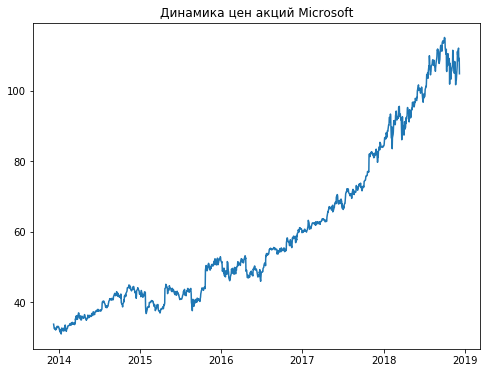

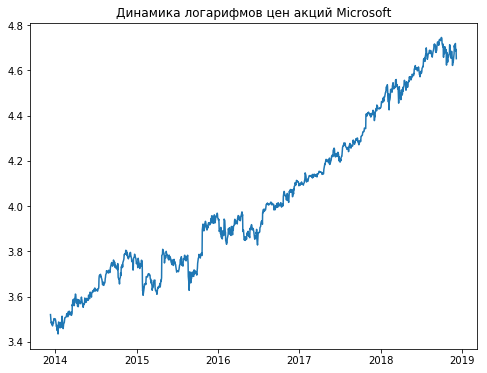

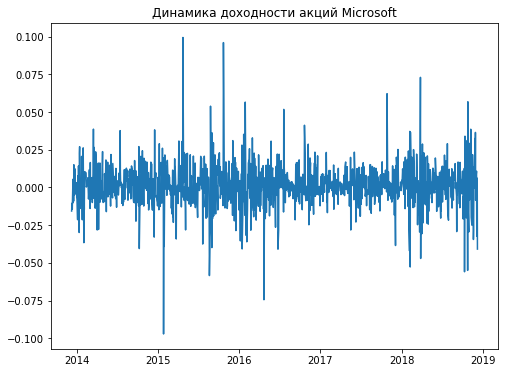

In [11]:
plt.figure(figsize=(8,6))
plt.plot(msft['Date'],msft['Adj Close'])
plt.title(u'Динамика цен акций Microsoft')

plt.figure(figsize=(8,6))
plt.plot(msft['Date'],np.log(msft['Adj Close']))
plt.title(u'Динамика логарифмов цен акций Microsoft')

plt.figure(figsize=(8,6))
plt.plot(msft['Date'],msft['Log_ret_MSFT'])
plt.title(u'Динамика доходности акций Microsoft')
plt.show()
plt.gcf().clear()

### Проверка временного ряда на стационарность ($\alpha=0.05$)

###  Модель авторегрессии - скользящего среднего корректно применять только к стационарным временным рядам. Стандартным критерием, используемым для проверки временного ряда на стационарность, явяляется критерий  Дикей-Фуллера (ADF - augmented Dickey-Fuller). В основе критерия лежит проверка значимости коэффициентов авторегрессии. Для данного критерия существуют специальные таблицы.

### Проведем исследование стационарности для логарифмов цен и логарифмической доходности. Нулевая гипотеза состоит в том, что  процесс носит нестационарный характер. Говоря математическим языком - корни характеристического уравнения авторегрессионной модели лежат вунтри единичного круга. 

In [12]:
tsa.stattools.adfuller(np.log(msft['Adj Close']),maxlag=10)
### логарифмы цен

(-0.10399823306438985,
 0.94903883496520136,
 8,
 1249,
 {'1%': -3.4355964295197743,
  '10%': -2.5680035060041626,
  '5%': -2.863856825923603},
 -7059.1343939966282)

In [13]:
tsa.stattools.adfuller(msft['Log_ret_MSFT'],maxlag=10)
### логарифмическая доходность

(-15.043751660747319,
 9.5101702844133704e-28,
 7,
 1250,
 {'1%': -3.4355922237096959,
  '10%': -2.5680025177600001,
  '5%': -2.8638549702604803},
 -7061.1250983591017)

### В приведенных результатах работы теста важным являются первые два элемента: само значение критерия и p-value. В случае логарифмов цен гипотеза об отсутствии стационарности принимается. В случае логарифмической доходности - гипотеза отвергается. Это означает, что для построения модели авторгерссии - скользящего среднего необходимо взять первые разности логарифмов цен (что и есть логарифмическая доходность).

### Определение порядков авторегресии и скользящего среднего

### Порядок процесса можно предварительно определить с помощью графиков авткорреляции и частной автокорреляция. Для этого построим указанные графики для стационарного процесса логарифмической доходности.

### 1. Значимые коэффициенты автокорреляции определяют порядок скользящего среднего
### 2. Значимые коэффициенты чстной автокорреляции определяют порядок авторегрессии

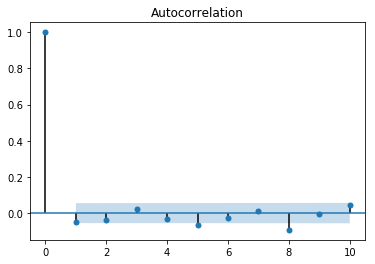

In [14]:
tsaplots.plot_acf(msft['Log_ret_MSFT'],lags=10)

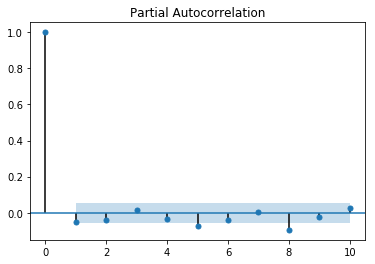

In [15]:
tsaplots.plot_pacf(msft['Log_ret_MSFT'],lags=10)

### В рассматриваемом случае нет возможности однозначно идентифицировать порядок модели только исходя из графиков.

### Построение модели ARIMA 

### Для целей задания и, в том числе исходя из результатов анализ PACF и ACF,  ограничимся самой простой моделью порядка (1,1,1), т.е. модель авторегрессии первого порядка и  скользящего среднего первого порядка, построенная по первым разностям.

### $\Delta y_t=\mu+\phi_1\Delta y_{t-1}+\epsilon_t+\theta_1\epsilon_{t-1}$

In [16]:
model_1=tsa.arima_model.ARIMA(np.log(msft['Adj Close']),order=(1,1,1))

/home/maxime/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/maxime/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [17]:
results_1=model_1.fit()

In [18]:
print(results_1.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1257
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3562.521
Method:                       css-mle   S.D. of innovations              0.014
Date:                Thu, 13 Dec 2018   AIC                          -7117.043
Time:                        22:31:00   BIC                          -7096.497
Sample:                             1   HQIC                         -7109.321
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0009      0.000      3.722      0.000       0.000       0.001
ar.L1.D.Adj Close     0.8727      0.137      6.392      0.000       0.605       1.140
ma.L1.D.Adj Close    -0.

### Построение модели ARIMA (1,0,1) для логарифмиеской доходности. Т.к. логарифмическая доходность представляет из себя первую разность, обе расмотренные модели должны совпасть.

In [19]:
model_2=tsa.arima_model.ARIMA(msft['Log_ret_MSFT'],order=(1,0,1))

/home/maxime/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [20]:
results_2=model_1.fit()

In [21]:
print(results_2.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1257
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3562.521
Method:                       css-mle   S.D. of innovations              0.014
Date:                Thu, 13 Dec 2018   AIC                          -7117.043
Time:                        22:31:01   BIC                          -7096.497
Sample:                             1   HQIC                         -7109.321
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0009      0.000      3.722      0.000       0.000       0.001
ar.L1.D.Adj Close     0.8727      0.137      6.392      0.000       0.605       1.140
ma.L1.D.Adj Close    -0.

### Остатки модели ARIMA должны быть процессом "белого шума" (отсутствует автокорреляция)

In [22]:
model_1_1=tsa.arima_model.ARIMA(results_1.resid,order=(1,0,0))
### модель ARIMA, построенная по логарифмическим доходностям порядка (1,0,0)

/home/maxime/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [23]:
results_1_1=model_1_1.fit()

In [24]:
print(results_1_1.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1257
Model:                     ARMA(1, 0)   Log Likelihood                3562.625
Method:                       css-mle   S.D. of innovations              0.014
Date:                Thu, 13 Dec 2018   AIC                          -7119.250
Time:                        22:31:02   BIC                          -7103.841
Sample:                             0   HQIC                         -7113.459
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.843e-05      0.000     -0.047      0.963      -0.001       0.001
ar.L1.y       -0.0122      0.028     -0.430      0.668      -0.068       0.043
                                    Roots           

### Общий вывод: Модель ARIMA (1,1,1), в целом, адекватно описывает исследуемый процесс. Коэффиценты AR  и MA меньше 1. Это говорит о том, что процесс имеет характер  "возврата к средней" (mean reversion). В частности, на основе данного процесса можно строить "статистические" арбитражные стратегии торговли. В противном случае речь идет о взрывной динамике, и процессом сложно управлять.

### 3.Построение модели $\beta$ и первичная проверка гипотезы CAPM

### Классическая версия модели CAPM предполагает отсутсвие в регрессионной модели свободного члена или в инвестиционной терминологии $\alpha$.  Это означает, что рассматриваемый актив не может систематически "обыграть" рынок. Таким образом, основной акцент делается на показателе рыночной $\beta$.

### $ER_i=R_f+\beta_i(ER_m-R_f)$

### Модель CAPM на основе индекса SP500 (дневные данные)

In [25]:
sp=pd.read_csv('/home/maxime/Documentos/Econometrics/^GSPC.csv')
# загрузка данных по динамике индекса SP500 

In [26]:
sp['Date']=pd.to_datetime(sp['Date'],format='%Y-%m-%d')
###  преобразование поля в формат даты

In [27]:
sp['Log_ret_SP']=np.log(sp['Adj Close'])-np.log(sp['Adj Close'].shift(1))
### расчет логарифмической доходности

In [28]:
sp.drop([0],axis=0,inplace=True)
### удаление первого наблюдения со значением nan

In [29]:
port=sp[['Date','Log_ret_SP']].merge(msft[['Date','Log_ret_MSFT']],left_on=['Date'],right_on=['Date'])
### объединение акций и индекса в один dataframe

In [30]:
port.columns=['Date','Log_ret_SP','Log_ret_MSFT']

In [31]:
port.tail()

,Date,Log_ret_SP,Log_ret_MSFT
1253,2018-11-30,0.008138,0.006333
1254,2018-12-03,0.010882,0.010763
1255,2018-12-04,-0.032900,-0.032368
1256,2018-12-06,-0.001523,0.006155
1257,2018-12-07,-0.023596,-0.040845


In [32]:
results_3=smf.ols('Log_ret_MSFT ~ Log_ret_SP',data=port).fit()
### простая линейная регрессия

In [33]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:           Log_ret_MSFT   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1314.
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          1.61e-197
Time:                        22:31:02   Log-Likelihood:                 4009.4
No. Observations:                1258   AIC:                            -8015.
Df Residuals:                    1256   BIC:                            -8004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.000      1.814      0.0

### Проверка выполнения условия гомоскедастичности с помощью критерия Бреуша-Пагана

In [34]:
lm,lm_value,fvalue,f_pvalue=test.het_breushpagan(results_3.resid,results_3.model.exog)

In [35]:
print('lm %.4f,lm_pvalue %.4f,fvalue %.4f,f_pvalue %.4f'%(lm,lm_value,fvalue,f_pvalue))

lm 0.0565,lm_pvalue 0.8121,fvalue 0.0564,f_pvalue 0.8123


### С учетом значения p-value гипотеза об отсутствии гомоскедастичности принимается

### Проверка наличия структурных сдвигов

### Структурный сдвиг означает, что процесс притерпевает определенные изменения, которые могут сильно сказаться на параметрах модели. В случае наличия структурного сдвга целесооборазно использовать не одну, а две модели - до сдвига и после. Проверка гипотезы об отсутствии структурных сдвигов осуществвляется с помощью ряда  критериев, самым популярным из которых в эконометрике остается тест Чоу. В statsmodels реализованы критерий кумулятивной суммы (CUSUM)  и критерий Хансена. 

In [36]:
diagnostic.breaks_cusumolsresid(results_3.resid)

(0.74173909151418826, 0.64108672290556767, [(1, 1.63), (5, 1.36), (10, 1.22)])

In [37]:
diagnostic.breaks_hansen(results_3)[0:2]

(2.4095495981471577, array([(2, 1.9), (6, 3.75), (15, 3.75), (19, 4.52)], 
       dtype=[('nobs', '<i8'), ('crit', '<f8')]))

### С учетом значения критериев и p-value гипотеза об отсутствии структурного сдвига принимается

### Общие выводы:
### 1. Уравнение значимо, что подтверждается t и F критериями.
### 2. Показатель $\beta$ = 1.26, это говорит о том, что акции Microsoft растут (и, соответственно, падают) сильнее рынка акций, включающего все отрасли.
### 3. Показатель $\alpha$ статистчически незначимо отличается от 0, что согласуется с моделью CAPM

### Модель CAPM на основе индекса NASDAQ (дневные данные)

In [38]:
nasdaq=pd.read_csv('/home/maxime/Documentos/Econometrics/^IXIC.csv')

In [39]:
nasdaq['Date']=pd.to_datetime(nasdaq['Date'],format='%Y-%m-%d')
###  преобразование поля в формат даты

In [40]:
nasdaq['Log_ret_Nasdaq']=np.log(nasdaq['Adj Close'])-np.log(nasdaq['Adj Close'].shift(1))

In [41]:
nasdaq.drop([0],axis=0,inplace=True)

In [42]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log_ret_Nasdaq
1,2013-12-12,4004.750000,4013.540039,3993.570068,3998.399902,3998.399902,1893270000,-0.001352
2,2013-12-13,4015.530029,4017.449951,3992.290039,4000.979980,4000.979980,1615340000,0.000645
3,2013-12-16,4019.370117,4043.000000,4019.139893,4029.520020,4029.520020,1943830000,0.007108
4,2013-12-17,4028.879883,4034.689941,4011.580078,4023.679932,4023.679932,1861130000,-0.001450
5,2013-12-18,4024.669922,4070.379883,3979.590088,4070.060059,4070.060059,2178330000,0.011461


In [43]:
port=port.merge(nasdaq[['Date','Log_ret_Nasdaq']],left_on=['Date'],right_on=['Date'])

In [44]:
port.head()

,Date,Log_ret_SP,Log_ret_MSFT,Log_ret_Nasdaq
0,2013-12-12,-0.003778,-0.010424,-0.001352
1,2013-12-13,-0.000101,-0.014342,0.000645
2,2013-12-16,0.006300,0.005437,0.007108
3,2013-12-17,-0.003106,-0.010081,-0.001450
4,2013-12-18,0.016511,0.001642,0.011461


In [45]:
results_4=smf.ols('Log_ret_MSFT ~ Log_ret_Nasdaq',data=port).fit()
### простая линейная регрессия

In [46]:
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:           Log_ret_MSFT   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1643.
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          2.87e-230
Time:                        22:31:02   Log-Likelihood:                 4079.3
No. Observations:                1256   AIC:                            -8155.
Df Residuals:                    1254   BIC:                            -8144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0004      0.000      1.

### Общие выводы:
### 1. Уравнение значимо, что подтверждается t и F критериями.
### 2. Показатель $\beta$ = 1.10, это говорит о том, что акции Microsoft растут (и, соответственно, падают) быстрее рынка технологических акций. 
### 3. Показатель $\alpha$ статистчически незначимо отличается от 0, что согласуется с моделью CAPM

### Модель CAPM на основе индекса SP500 (месячные данные)

In [47]:
port['Year']=port['Date'].dt.year

In [48]:
port['Month']=port['Date'].dt.month

### Для преобразования дневных доходностей в месячные доходности воспользуемся удобным свойством логарифма и просуммируем дневные доходности по каждому месяцу

In [49]:
port_monthly=port.groupby(['Year','Month'])[['Log_ret_SP','Log_ret_MSFT','Log_ret_Nasdaq']].sum()
### преобразование дневных доходностей в месячные доходности

In [50]:
port_monthly.head()

Log_ret_SP  Log_ret_MSFT  Log_ret_Nasdaq
Year Month                                          
2013 12       0.036439     -0.005332        0.042249
2014 1       -0.036231      0.011429       -0.017562
     2        0.042213      0.019815        0.048569
     3        0.006908      0.067617       -0.025658
     4        0.006182     -0.014498       -0.020312

In [51]:
np.log(float(msft[msft.Date=='2014-01-31']['Adj Close'])/float(msft[msft.Date=='2013-12-31']['Adj Close']))
### проверка формулы получения месячной доходности

0.011428544757738605

In [52]:
results_5=smf.ols('Log_ret_MSFT ~ Log_ret_SP',data=port_monthly).fit()
### простая линейная регрессия

In [53]:
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:           Log_ret_MSFT   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     38.48
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           5.94e-08
Time:                        22:31:02   Log-Likelihood:                 103.46
No. Observations:                  61   AIC:                            -202.9
Df Residuals:                      59   BIC:                            -198.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0109      0.006      1.850      0.0

### Выводы аналогичны предыдущим моделям

In [ ]:
## 4.Функции для расчета VAR 

In [ ]:
### 1. Выбрать компанию и загрузить из внешних источников исторические цены акций (например, Yahoo finance)
### 2. Провести предварительный анализ временного ряда цен, проверить гипотезу стационарности
### 3. Провести первичную идентификацию порядка модели ARIMA
### 4. Построить модель ARIMA (1,1,1) и сделать краткие выводы
### 5. Построить модель CAPM по рыночным данным, получить $\beta$, оценить значимость $\alpha$, сравнить полученный показатель $\beta$ с данными из общедоступных источников информаци (например, Yahoo, Reuters)